In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

import warnings
warnings.filterwarnings('ignore')

# EDA
Performing Exploratory Data Analysis (EDA) helps to understand the main characteristics of a dataset.


In [2]:
df = pd.read_parquet('../datasets/clean.parquet')

In [5]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,Air Carrier Name
0,1,2,9E,3280,11953,GNV,10397,ATL,601.0,0,0600-0659,300.0,Endeavor Air
1,1,2,9E,3281,13487,MSP,11193,CVG,1359.0,0,1400-1459,596.0,Endeavor Air
2,1,2,9E,3282,11433,DTW,11193,CVG,1215.0,0,1200-1259,229.0,Endeavor Air
3,1,2,9E,3283,15249,TLH,10397,ATL,1521.0,0,1500-1559,223.0,Endeavor Air
4,1,2,9E,3284,10397,ATL,11778,FSM,1847.0,0,1900-1959,579.0,Endeavor Air


## Initial inspections

In [6]:
# check the number of unique values in each column
df.nunique()

DAY_OF_MONTH           31
DAY_OF_WEEK             7
OP_CARRIER             17
OP_CARRIER_FL_NUM    6997
ORIGIN_AIRPORT_ID     353
ORIGIN                353
DEST_AIRPORT_ID       353
DEST                  353
DEP_TIME             1440
DEP_DEL15               2
DEP_TIME_BLK           19
DISTANCE             1511
Air Carrier Name       17
dtype: int64

How is the target variable (Departure Delay Indicator) distributed? What percentage of flights are delayed?

In [8]:
df['DEP_DEL15'].value_counts(normalize=True)

DEP_DEL15
0    0.845391
1    0.154609
Name: proportion, dtype: float64

We can observed a class imbalanced, most of the data is 0

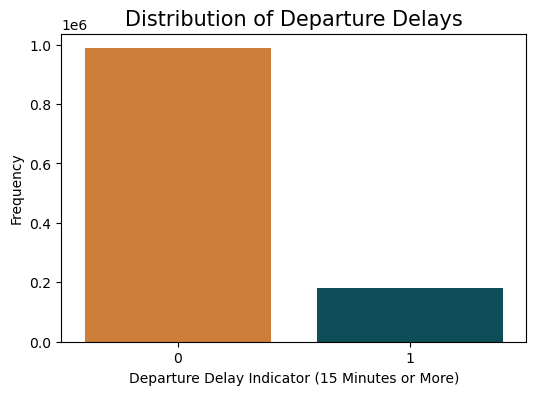

In [9]:
# plot the distribution of the target variable
plt.figure(figsize=(6, 4))

sns.countplot(x='DEP_DEL15', data=df, palette=['#E57C23',"#025464"])

plt.title('Distribution of Departure Delays', fontsize=15)
plt.xlabel('Departure Delay Indicator (15 Minutes or More)')
plt.ylabel('Frequency')
plt.show()


What is the average departure delay for each carrier? Are there carriers that tend to have more delays than others?

In [10]:
mean_delay_carrier = df.groupby('Air Carrier Name')['DEP_DEL15'].mean().sort_values(ascending=False)
mean_delay_carrier

Air Carrier Name
Jetblue Airways Corporation    0.209495
Allegiant Air LLC              0.195611
Frontier Airlines, Inc.        0.193235
Envoy Air                      0.183060
Skywest Airlines               0.178295
Jetstream Intl                 0.171419
ExpressJet Airlines            0.168094
Alaska Airlines                0.161373
Mesa Airlines, Inc.            0.161056
United Airlines, Inc.          0.154216
American Airlines              0.152551
Southwest Airlines             0.148063
Endeavor Air                   0.147401
Republic Airlines              0.145213
Spirit Airlines, Inc.          0.141101
Delta Air Lines, Inc.          0.114287
Hawaiian Airlines Inc.         0.082700
Name: DEP_DEL15, dtype: float64

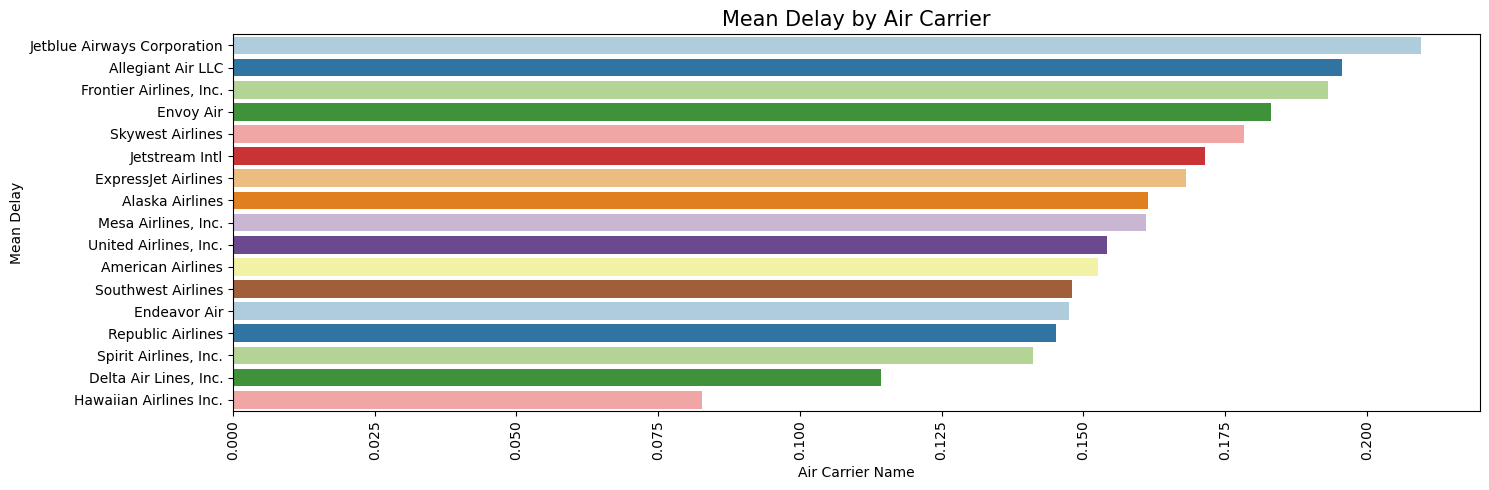

In [11]:
plt.figure(figsize=(15, 5))
sns.barplot(x=mean_delay_carrier.values, y=mean_delay_carrier.index, palette='Paired', orient='h')

plt.xticks(rotation=90)

# Add title and labels
plt.title('Mean Delay by Air Carrier', fontsize=15)
plt.xlabel('Air Carrier Name')
plt.ylabel('Mean Delay')

# Show plot
plt.tight_layout()
plt.show()

In [12]:
mean_origin_delay = df.groupby('ORIGIN')['DEP_DEL15'].mean().sort_values(ascending=False).nlargest(10)
mean_origin_delay

ORIGIN
OGD    0.411765
HGR    0.409091
ART    0.382979
ASE    0.346365
OGS    0.344828
SLN    0.306667
LCK    0.305263
MEI    0.302013
PVU    0.294643
RIW    0.291667
Name: DEP_DEL15, dtype: float64

What are the top 10 carriers in terms of flight volume? The top 10 origin and destination airports?

In [13]:
# Top 10 carriers in terms of flight volume
top_10_carriers = df['Air Carrier Name'].value_counts().nlargest(10)
print("Top 10 Carriers:")
print(top_10_carriers)

# Top 10 origin airports
top_10_origin_airports = df['ORIGIN'].value_counts().nlargest(10)
print("\nTop 10 Origin Airports:")
print(top_10_origin_airports)

# Top 10 destination airports
top_10_destination_airports = df['DEST'].value_counts().nlargest(10)
print("\nTop 10 Destination Airports:")
print(top_10_destination_airports)


Top 10 Carriers:
Air Carrier Name
Southwest Airlines             215212
Delta Air Lines, Inc.          153534
American Airlines              151097
Skywest Airlines               131804
United Airlines, Inc.           94322
Republic Airlines               53494
Envoy Air                       49126
Jetblue Airways Corporation     48154
Jetstream Intl                  46465
Endeavor Air                    42849
Name: count, dtype: int64

Top 10 Origin Airports:
ORIGIN
ATL    62944
ORD    48224
DFW    46648
CLT    38713
DEN    38479
LAX    35405
PHX    29789
IAH    29212
LAS    27157
LGA    27110
Name: count, dtype: int64

Top 10 Destination Airports:
DEST
ATL    62924
ORD    48118
DFW    46589
CLT    38655
DEN    38409
LAX    35337
PHX    29758
IAH    29134
LAS    27159
LGA    27118
Name: count, dtype: int64


Same but visually

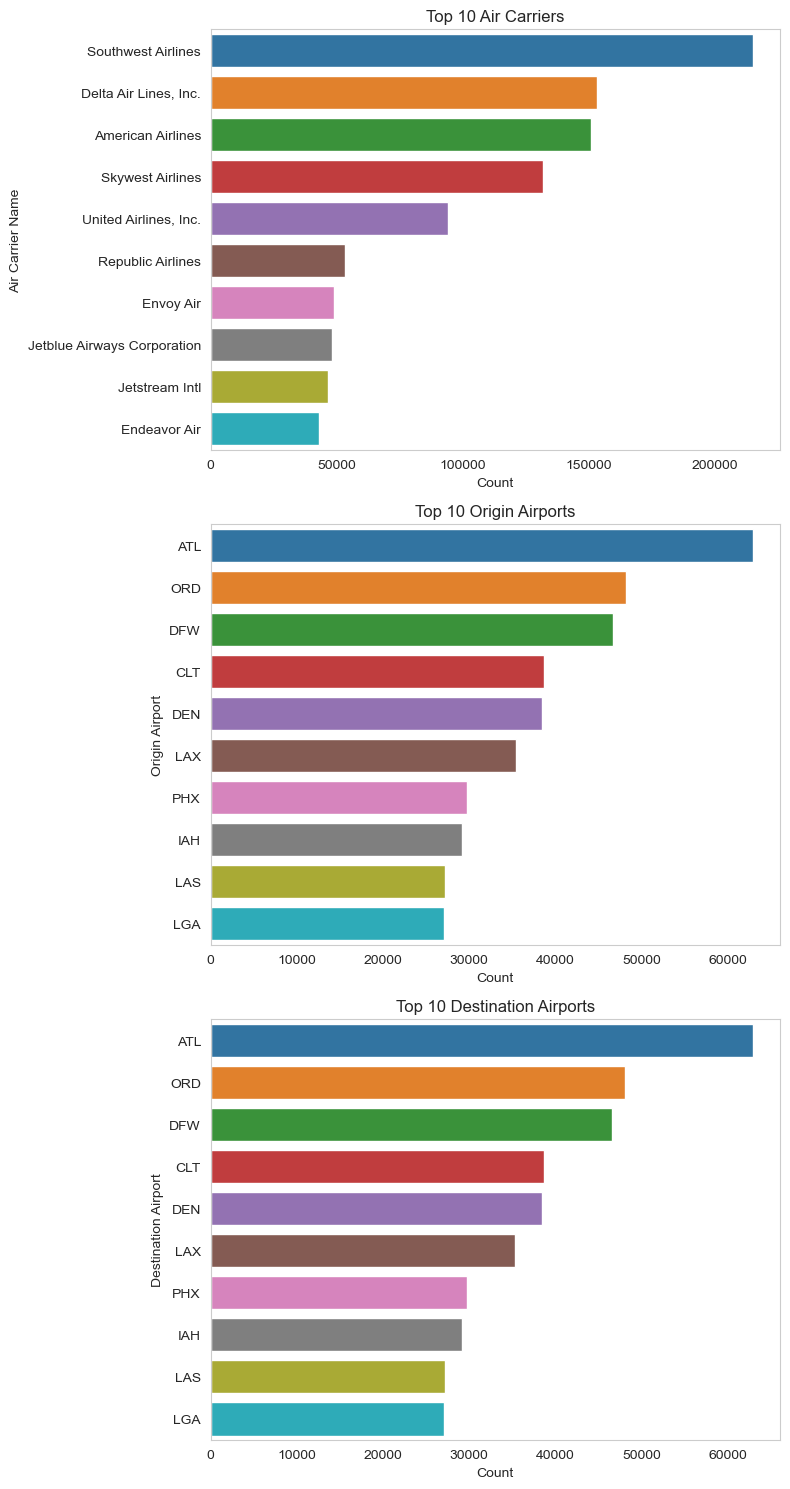

In [17]:
# Create a new figure with 3 subplots, arranged vertically
fig, ax = plt.subplots(3, 1, figsize=(8, 15))

# Remove grid lines
for axes in ax:
    axes.grid(False)

# Plot the top 10 carriers
sns.barplot(y=top_10_carriers.index, x=top_10_carriers.values, ax=ax[0])
ax[0].set_title('Top 10 Air Carriers')
ax[0].set_ylabel('Air Carrier Name')
ax[0].set_xlabel('Count')

# Plot the top 10 origin airports
sns.barplot(y=top_10_origin_airports.index, x=top_10_origin_airports.values, ax=ax[1])
ax[1].set_title('Top 10 Origin Airports')
ax[1].set_ylabel('Origin Airport')
ax[1].set_xlabel('Count')

# Plot the top 10 destination airports
sns.barplot(y=top_10_destination_airports.index, x=top_10_destination_airports.values, ax=ax[2])
ax[2].set_title('Top 10 Destination Airports')
ax[2].set_ylabel('Destination Airport')
ax[2].set_xlabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


How does the delay changes based on departure time blocks

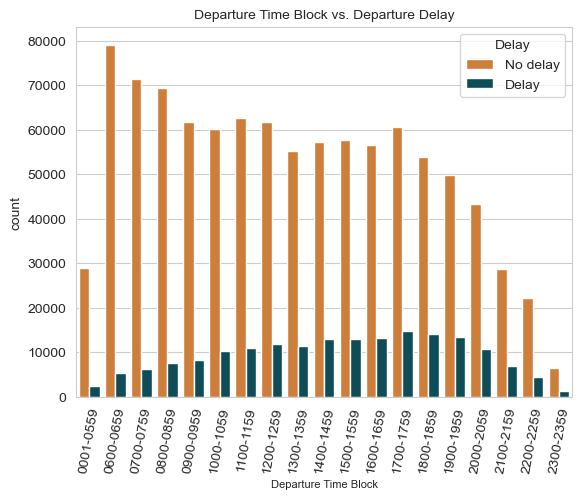

In [11]:
order = sorted(df['DEP_TIME_BLK'].unique())

ax = sns.countplot(x = 'DEP_TIME_BLK', data = df, hue = 'DEP_DEL15', order=order, palette=['#E57C23',"#025464"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.set_title('Departure Time Block vs. Departure Delay', fontsize = 10)
ax.set_xlabel('Departure Time Block', fontsize = 8)
ax.legend(title='Delay', loc='best', labels=['No delay', 'Delay'])
plt.show()

What days of the week and of the month does delays happened more

In [17]:
df.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().sort_values(ascending=False)

DAY_OF_WEEK
6    0.171505
4    0.165242
5    0.163341
7    0.160127
1    0.155786
3    0.138834
2    0.131708
Name: DEP_DEL15, dtype: float64

In [18]:
df.groupby('DAY_OF_MONTH')['DEP_DEL15'].mean().sort_values(ascending=False)


DAY_OF_MONTH
24    0.199510
18    0.198360
2     0.196813
3     0.192524
4     0.183833
23    0.181667
17    0.179219
11    0.178532
21    0.178300
1     0.173252
16    0.172636
31    0.171241
25    0.169607
5     0.169129
6     0.162247
13    0.156878
12    0.154438
20    0.152710
27    0.148795
22    0.148088
19    0.145459
30    0.140994
10    0.140076
14    0.130742
28    0.126883
7     0.116401
15    0.111932
26    0.111479
8     0.111012
29    0.098629
9     0.088605
Name: DEP_DEL15, dtype: float64

In [19]:
delayed_flights_by_month = df[df['DEP_DEL15'] == 1].groupby('DAY_OF_MONTH').size()
delayed_flights_by_month.sort_values(ascending=False)

DAY_OF_MONTH
2     8017
24    7984
3     7684
23    7109
17    7001
4     6900
18    6845
16    6792
21    6769
31    6664
6     6497
5     6297
1     6213
11    6194
25    6067
13    6002
27    5756
10    5577
22    5496
20    5482
12    5355
30    5309
14    5052
28    4768
19    4568
7     4538
15    4255
8     4242
26    3910
29    3663
9     3527
dtype: int64

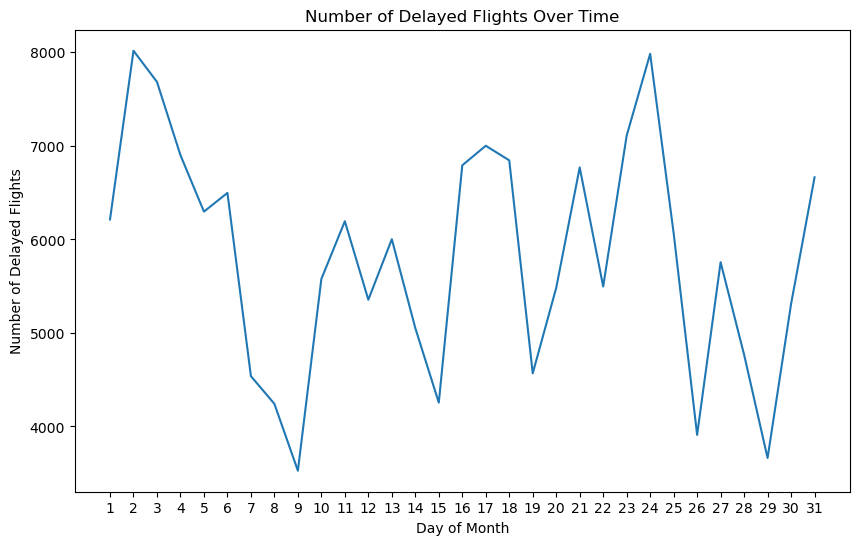

In [20]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(delayed_flights_by_month)
plt.title('Number of Delayed Flights Over Time')
plt.xlabel('Day of Month')
plt.ylabel('Number of Delayed Flights')
plt.xticks(ticks=range(1, 32), labels=[x for x in range(1, 32)])
plt.show()

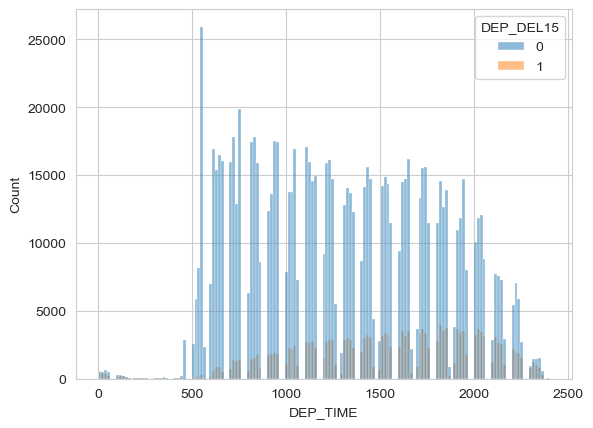

In [18]:
ax = sns.histplot(x ='DEP_TIME', data = df, hue = 'DEP_DEL15');
# at later departure times delays tend to happen more often

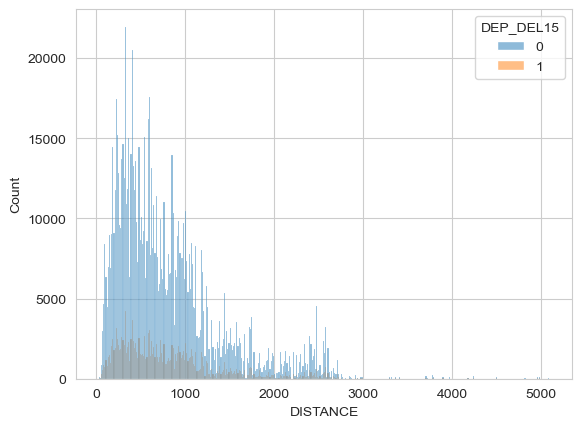

In [19]:
sns.histplot(x = 'DISTANCE', hue = 'DEP_DEL15', data = df);
plt.show()
# delays occur more often on shorter flights